# A preliminary pipeline to collect features

In [14]:
import jusipy
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# Load datasets
LM        = jusipy.deals.LandMatrix()
A_country = jusipy.country_features.All()
A_latlong = jusipy.latlong_features.All()
GLCF_8km  = A_latlong.datasets[2]         # extract from A_latlong, just to not load this one twice...

Loading GLCF(8km)                                                                                                     reas)                                                                                                      

In [3]:
# Load GIS tools
GC = jusipy.GIS.GoogleCode(cache=jusipy.utils.FireDict(sub='googlecode'))
CC = jusipy.GIS.CountryCode()
CLL = jusipy.GIS.CountryLatLong()

## Select the points, and get the relevant data

### Positive points from LandMatrix

In [21]:
positive_points = LM.M[['lat', 'long', 'target_country_iso3', 'negotiation_year']]
positive_points = positive_points.rename(columns={'target_country_iso3' : 'country',
                                                  'negotiation_year' : 'year'})
positive_points['positive'] = 1
positive_points['random']   = 0
positive_points['year'] = positive_points.year.apply(lambda x: 'newest' if pd.isna(x) else x)

### Random points selected from around the earth

In [6]:
random_points = pd.DataFrame(jusipy.GIS.sample.random_latlong(land=True, glcf=GLCF_8km, size=11000),
                             columns=['lat', 'long'])
random_points.to_pickle('data/random_points.pkl')
random_points = pd.read_pickle('data/random_points.pkl')
random_points['country'] = CLL.get(zip(random_points.lat, random_points.long))

random_points['year'] = ['newest'] * len(random_points.lat)
random_points['positive'] = 0
random_points['random']   = 1

random_points = random_points[~pd.isna(random_points.country)]

### Combine the two stacks of data

In [22]:
all_points = pd.concat([positive_points, random_points])
all_points.to_pickle('data/all_points.pkl')
all_points

,lat,long,country,year,positive,random
0,19.8101,93.987843,MMR,2007,1,0
1,22.8724,91.097318,BGD,2003,1,0
2,13.8577,107.101193,KHM,2005,1,0
3,12.4897,106.028751,KHM,2008,1,0
4,12.7879,107.101193,KHM,2009,1,0
5,12.5657,104.990963,KHM,2010,1,0
6,12.6926,104.900925,KHM,2005,1,0
7,14.1717,103.636272,KHM,2008,1,0
8,12.4897,106.028751,KHM,2006,1,0
9,11.8302,106.178679,KHM,newest,1,0


## Visualize the Spatial data

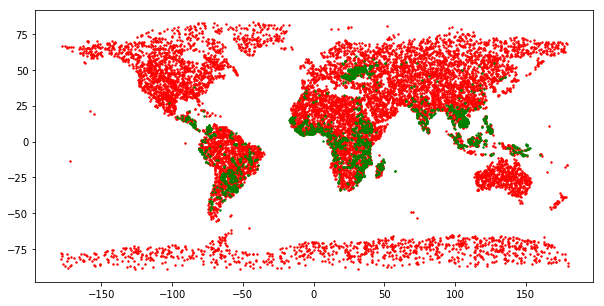

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(all_points.long[all_points.random == 1], all_points.lat[all_points.random ==1], c='r', s=1, zorder=1)

plt.scatter(all_points.long[all_points.random == 0], all_points.lat[all_points.random ==0], c='g', s=1, zorder=2)
#plt.scatter

## Collect features for each point

In [23]:
#country_features = jusipy.country_features.get(all_points, A_country)
latlong_features = jusipy.latlong_features.get(all_points, A_latlong)
#all_features = country_features.join(latlong_features)

## Store the output

In [ ]:
all_points.to_pickle('data/all_labels.pkl')
all_features.to_pickle('data/all_features.pkl')

In [9]:
len(GC._cache._cache.keys())

5010

In [26]:
latlong_features = latlong_features.drop(columns=['coding_error_do_not_use_feature'])

In [110]:
neg = jusipy.deals.Negative(all_points, latlong_features, autorun=False)

In [111]:
neg.run(bandwidth=20)

Performing PCA
Performing TSNE
Performing Clustering
Selecting negatives


array([0, 0, 0, ..., 0, 1, 0])

No handles with labels found to put in legend.


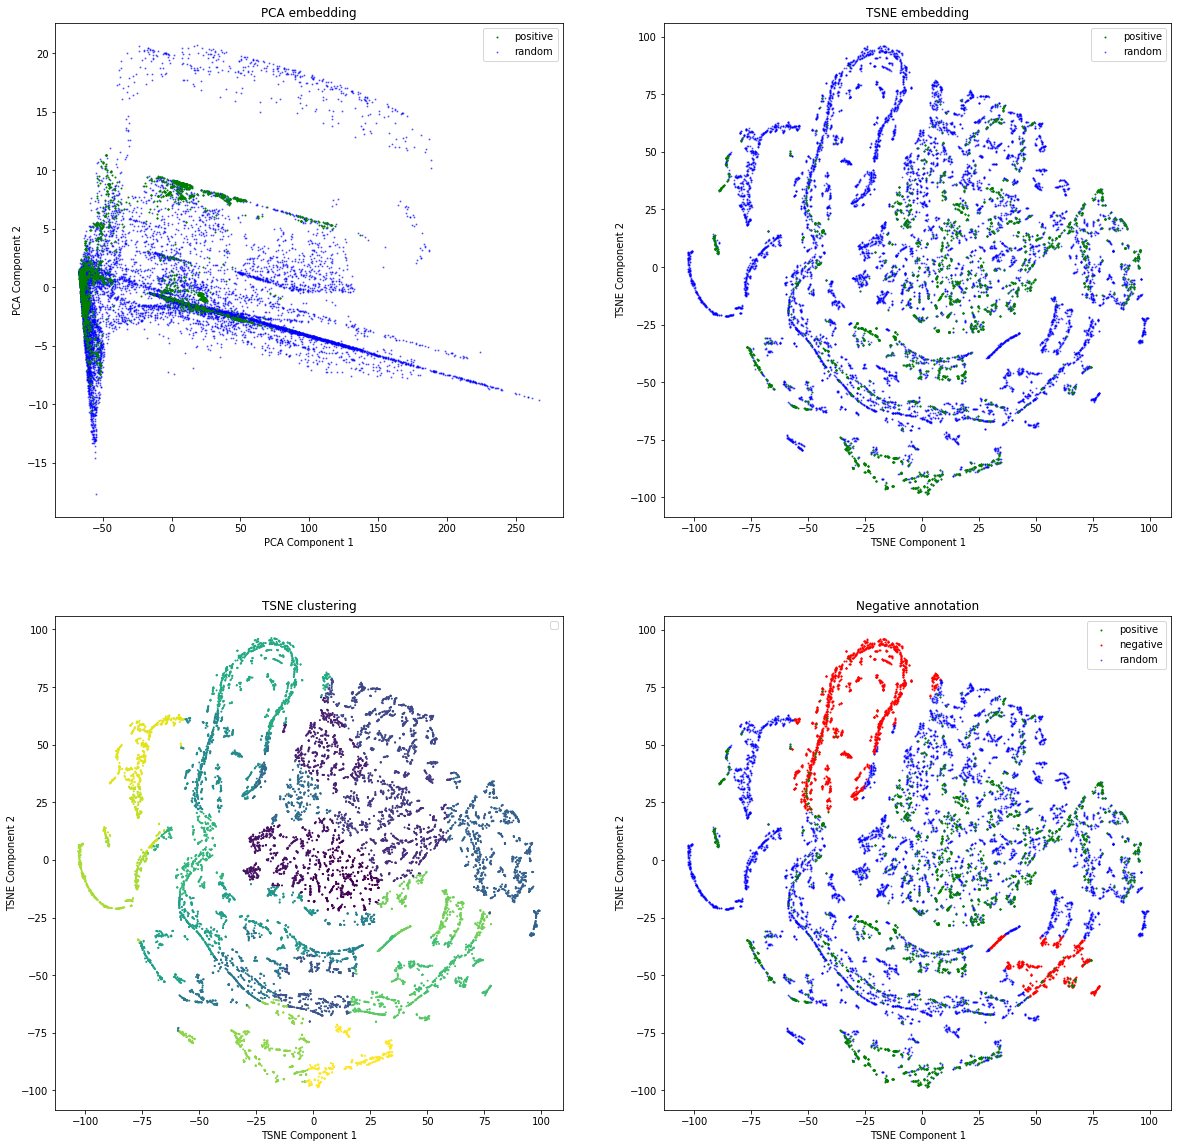

In [112]:
fig, axes = neg.plot()